In [1]:
import numpy as np
class Perceptron(object):
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        print(self.w_)
        self.errors_=[]
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                update=self.eta*(target-self.predict(xi))
                print(update)
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                print(self.w_)
                errors+=int(update !=0.0)
                print(errors)
            self.errors_.append(errors)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,-1)

In [2]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
df.tail(5)

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
y=df.iloc[0:100,4].values
y=np.where(y=='iris-setosa',-1,1)
X=df.iloc[0:100,[0,2]].values

[ 0.01624345 -0.00611756 -0.00528172]
0.02
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.09588244 0.02271828]
1
0.0
[0.03624345 0.

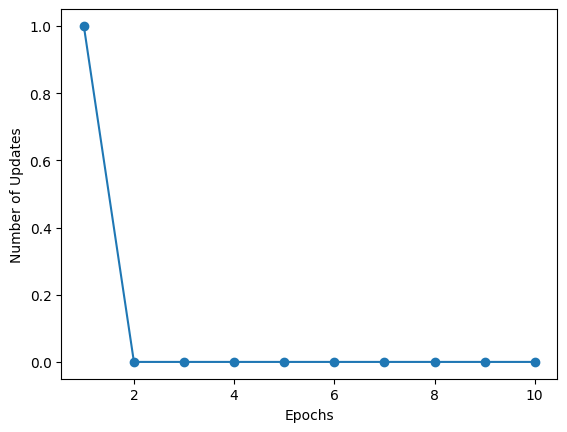

In [4]:
import matplotlib.pyplot as plt
ppn=Perceptron(eta=0.01,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of Updates")
plt.show()

In [5]:
class AdalineGD(object):
    def __init__(self,eta=0.1,n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0] +=self.eta*errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return X
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))>= 0.0, 1, -1)

In [6]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

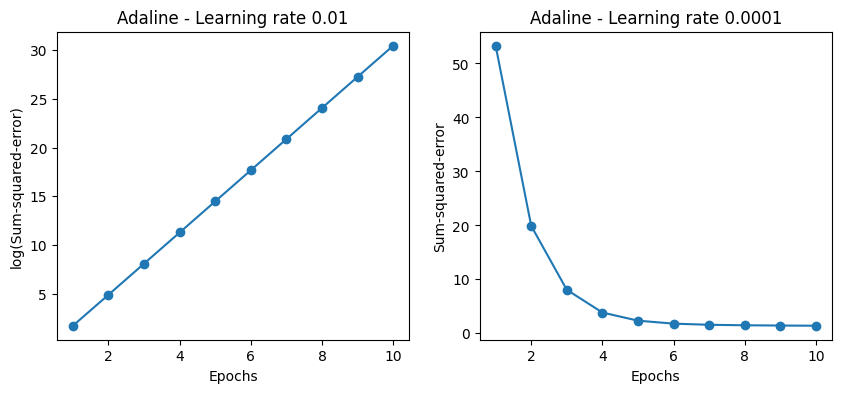

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [8]:
from sklearn import datasets
iris = datasets.load_iris()


In [9]:
X=iris.data[:,[2,3]]
y=iris.target

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [11]:
np.bincount(y)

array([50, 50, 50], dtype=int64)

In [12]:
np.bincount(y_train)

array([35, 35, 35], dtype=int64)

In [13]:
np.bincount(y_test)

array([15, 15, 15], dtype=int64)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_Std=sc.transform(X_train)
X_test_Std=sc.transform(X_test)

In [15]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40,eta0=0.1,random_state=1)
ppn.fit(X_train_Std,y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [16]:
y_pred=ppn.predict(X_test_Std)

In [17]:
print('Misclassification Error is %d' % (y_test!=y_pred).sum())

Misclassification Error is 1


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777777777777777

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,random_state=1)
lr.fit(X_train_Std,y_train)

LogisticRegression(C=100, random_state=1)

In [20]:
lr.predict_proba(X_test_Std[:3,:])

array([[9.37368464e-13, 3.91458193e-04, 9.99608542e-01],
       [9.93631074e-01, 6.36892585e-03, 1.20730798e-15],
       [9.98707332e-01, 1.29266792e-03, 1.82177043e-17]])

In [21]:
from sklearn.svm import SVC
#from sklearn.svm import SVR
svm= SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_Std,y_train)

SVC(kernel='linear', random_state=1)

In [22]:
from sklearn.linear_model import SGDClassifier
ppn=SGDClassifier(loss='perceptron')
lr=SGDClassifier(loss='log')
svm=SGDClassifier(loss='hinge')

In [23]:
svm=SVC(kernel='rbf',C=10.0,gamma=0.10,random_state=1)
svm.fit(X_train_Std,y_train)


SVC(C=10.0, gamma=0.1, random_state=1)

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_Std,y_train)

KNeighborsClassifier()

In [27]:
import pandas as pd
from io import StringIO
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [28]:
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [29]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [30]:
df.dropna(axis=1) # drop column with missing values

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [31]:
# only drop rows where all columns are NaN
# (returns the whole array here since we don't
# have a row with where all values are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [32]:
# drop rows that have less than 4 real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [33]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [34]:
df['D']

0    4.0
1    8.0
2    NaN
Name: D, dtype: float64

In [35]:
from sklearn.impute import SimpleImputer
import numpy as np
imr=SimpleImputer(missing_values=np.nan, strategy='mean')
imr=imr.fit(df[['D']])
imputed_data = imr.transform(df[['D']])
imputed_data

array([[4.],
       [8.],
       [6.]])

In [36]:
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [37]:
size_mapping = {'XL': 3,'L': 2,'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [38]:
df['classlabel'].map(lambda x: x.split('s'))

0    [cla, , 1]
1    [cla, , 2]
2    [cla, , 1]
Name: classlabel, dtype: object

In [39]:
class_mapping={classlabel:idx for idx,classlabel in enumerate(np.unique(df['classlabel']))}
df['classlabel'] = df['classlabel'].map(class_mapping)

In [40]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [41]:
X=df[['color','size','price']].values
color_le=LabelEncoder()
X[:,0]=color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [42]:
# from sklearn.compose import ColumnTransformer 
# ct = ColumnTransformer([("Name_Of_Your_Step", OneHotEncoder(),[0])], remainder="passthrough") # The last arg ([0]) is the list of columns you want to transform in this step
# ct.fit_transform(X) 

In [43]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [44]:
pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [45]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
 'ml/machine-learning-databases/'
 'wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [46]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
train_test_split(X, y,test_size=0.3,random_state=0,stratify=y)

In [47]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.fit_transform(X_test)

In [48]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',C=1.0)

In [50]:
lr

LogisticRegression(penalty='l1')

In [51]:
from sklearn.ensemble import RandomForestClassifier
feat_labels=df_wine.columns[1:]
forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [52]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


In [53]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [54]:
cov_mat=np.cov(X_train_std.T)

In [55]:
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)

In [56]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [57]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))

In [58]:
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [59]:
 X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
lr=LogisticRegression()
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [61]:
pca=PCA(n_components=None)
pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
X_test_lda = lda.transform(X_test_std)

In [63]:
import warnings
warnings.filterwarnings('ignore')
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [64]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=df.loc[:,2:].values
y=df.loc[:,1].values
y=le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr=make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(random_state=1))
pipe_lr.fit(X_train,y_train)
y_pred=pipe_lr.predict(X_test)
print("accuracy is %3.f" % pipe_lr.score(X_test,y_test))

accuracy is   1


In [67]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
kfold=StratifiedKFold(n_splits=10).split(X_train,y_train)
scores=[]
for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('fold: %d , class distribution: %s, accuracy: %.3f' % (k+1,np.bincount(y_train[train]),score))

fold: 1 , class distribution: [256 153], accuracy: 0.935
fold: 2 , class distribution: [256 153], accuracy: 0.935
fold: 3 , class distribution: [256 153], accuracy: 0.957
fold: 4 , class distribution: [256 153], accuracy: 0.957
fold: 5 , class distribution: [256 153], accuracy: 0.935
fold: 6 , class distribution: [257 153], accuracy: 0.956
fold: 7 , class distribution: [257 153], accuracy: 0.978
fold: 8 , class distribution: [257 153], accuracy: 0.933
fold: 9 , class distribution: [257 153], accuracy: 0.956
fold: 10 , class distribution: [257 153], accuracy: 0.956


In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


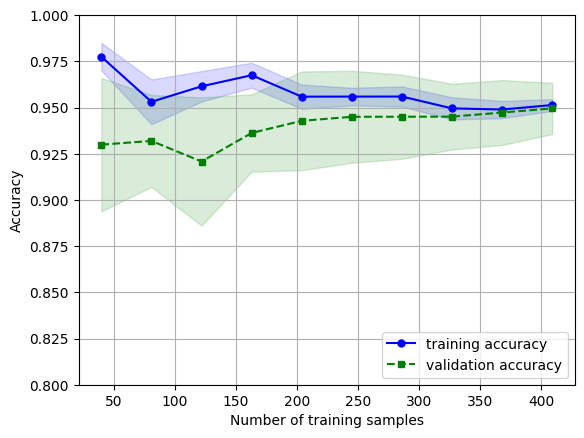

In [69]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores,test_scores=learning_curve(estimator=pipe_lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1,10),cv=10,n_jobs=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

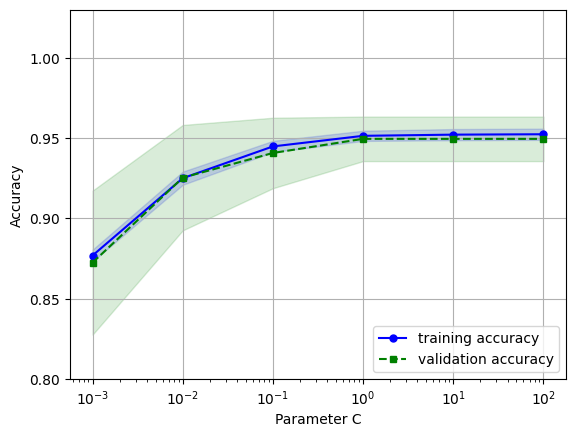

In [70]:
from sklearn.model_selection import validation_curve
param_range=[0.001,0.01,0.1,1,10,100]
train_scores,test_scores=validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='logisticregression__C',param_range=param_range,cv=10)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc=make_pipeline(StandardScaler(),SVC(random_state=1))
param_range=[0.0001,0.001,0.01,0.1,1,10,100,1000]
param_grid=[{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
gs=GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [72]:
clf=gs.best_estimator_
clf.fit(X_train,y_train)
print('test accuracy: %.2f' % clf.score(X_test,y_test))

test accuracy: 0.97


In [73]:
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=2)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.974 +/- 0.015


In [74]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=[{'max_depth': [1, 2, 3,4, 5, 6, 7, None]}],scoring='accuracy',cv=2)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.934 +/- 0.016


In [75]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred=pipe_svc.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


In [76]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision: %.3f' % precision_score(y_true=y_test,y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test,y_pred=y_pred))
print('F1 Score: %.3f' % f1_score(y_true=y_test,y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1 Score: 0.964


In [77]:
from sklearn.metrics import make_scorer, f1_score
scorer=make_scorer(f1_score,pos_label=0)
gs=GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring=scorer,cv=10)
gs=gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9880771478667446
{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


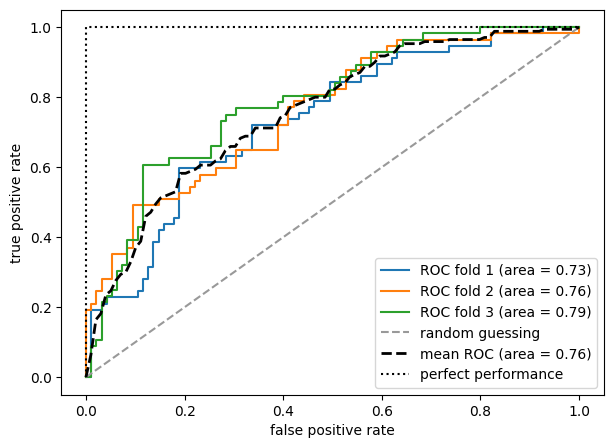

In [79]:
from sklearn.metrics import roc_curve,auc
from scipy import interp
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(penalty='l2',random_state=1,C=100.0))
X_train2=X_train[:,[4,14]]
cv=list(StratifiedKFold(n_splits=3).split(X_train,y_train))
fig=plt.figure(figsize=(7,5))
mean_tpr=0
mean_fpr=np.linspace(0,1,100)
all_tpr=[]
for i, (train,test) in enumerate(cv):
    probas=pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
    fpr,tpr,thresholds=roc_curve(y_train[test],probas[:,1],pos_label=1)
    mean_tpr += interp(mean_fpr,fpr,tpr)
    mean_tpr[0]=0.0
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label='ROC fold %d (area = %.2f)' % (i+1,roc_auc))
plt.plot([0,1],[0,1],linestyle='--',color=(0.6,0.6,0.6),label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],[0, 1, 1],linestyle=':',color='black',label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.show()

In [80]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [81]:
from sklearn.utils import resample
print('Number of class 1 samples before:',X_imb[y_imb == 1].shape[0])
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],y_imb[y_imb == 1],replace=True,n_samples=X_imb[y_imb == 0].shape[0],random_state=123)
print('Number of class 1 samples after:',X_upsampled.shape[0])

Number of class 1 samples before: 40
Number of class 1 samples after: 357


In [ ]:
from skle